<a href="https://colab.research.google.com/github/sathasivamn/Association-Rules/blob/main/Assignment_10_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rules
## Data Preprocessing
## Implementing Association Rule Mining (Apriori Algorithm)
## Analyzing and Interpreting Rules
## Answering Interview Questions

In [2]:
# Install necessary libraries
!pip install mlxtend openpyxl

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
# Load dataset
df = pd.read_excel("Online retail.xlsx")

In [5]:
# Display first few rows
print("Dataset Preview:\n", df.head())

Dataset Preview:
   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                          

# Preprocess the data

## Convert transactions into a list of lists.
## Perform one-hot encoding (convert items to a binary matrix format).

In [22]:
# Data Preprocessing

# Convert the single column of items to a list of lists
transactions = df.iloc[:, 0].dropna().apply(lambda x: x.split(','))

In [23]:
# One-hot encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm:
## Use mlxtend to find frequent itemsets.
## Generate association rules based on support, confidence, and lift.

In [24]:
# Applying Apriori Algorithm

# Generate frequent itemsets with min_support=0.01 (1% of transactions)
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [25]:
# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

In [26]:
# Generate association rules with min_confidence=0.2 (20%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [27]:
# Sort by Lift (to find the most meaningful rules)
rules_sorted = rules.sort_values(by="lift", ascending=False)

In [28]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [29]:
# Display top rules sorted by lift
rules.sort_values(by="lift", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
123,(ground beef),(herb & pepper),0.135845,0.066473,0.022802,0.167852,2.525100,1.0,0.013772,1.121828,0.698921,0.127018,0.108597,0.255438
122,(herb & pepper),(ground beef),0.066473,0.135845,0.022802,0.343023,2.525100,1.0,0.013772,1.315350,0.646983,0.127018,0.239746,0.255438
205,"(spaghetti, mineral water)",(ground beef),0.085024,0.135845,0.024734,0.290909,2.141472,1.0,0.013184,1.218680,0.582563,0.126108,0.179440,0.236493
208,(ground beef),"(spaghetti, mineral water)",0.135845,0.085024,0.024734,0.182077,2.141472,1.0,0.013184,1.118657,0.616824,0.126108,0.106071,0.236493
114,(tomatoes),(frozen vegetables),0.091981,0.129855,0.022609,0.245798,1.892867,1.0,0.010665,1.153730,0.519483,0.113482,0.133246,0.209953
115,(frozen vegetables),(tomatoes),0.129855,0.091981,0.022609,0.174107,1.892867,1.0,0.010665,1.099440,0.542094,0.113482,0.090446,0.209953
110,(shrimp),(frozen vegetables),0.098744,0.129855,0.023768,0.240705,1.853640,1.0,0.010946,1.145990,0.510977,0.116038,0.127392,0.211870
111,(frozen vegetables),(shrimp),0.129855,0.098744,0.023768,0.183036,1.853640,1.0,0.010946,1.103177,0.529246,0.116038,0.093527,0.211870
207,(spaghetti),"(ground beef, mineral water)",0.229565,0.058744,0.024734,0.107744,1.834131,1.0,0.011249,1.054917,0.590293,0.093842,0.052058,0.264398
206,"(ground beef, mineral water)",(spaghetti),0.058744,0.229565,0.024734,0.421053,1.834131,1.0,0.011249,1.330751,0.483166,0.093842,0.248545,0.264398


In [30]:
# Display top 10 rules
print("\nTop 10 Association Rules:\n", rules_sorted.head(10))


Top 10 Association Rules:
                       antecedents          consequents  antecedent support  \
75                (herb & pepper)        (ground beef)            0.066473   
120    (spaghetti, mineral water)        (ground beef)            0.085024   
70                     (tomatoes)  (frozen vegetables)            0.091981   
68                       (shrimp)  (frozen vegetables)            0.098744   
121  (ground beef, mineral water)          (spaghetti)            0.058744   
80                  (ground beef)          (spaghetti)            0.135845   
79                    (spaghetti)        (ground beef)            0.229565   
90                         (soup)               (milk)            0.070918   
78                    (olive oil)        (ground beef)            0.087536   
88                    (olive oil)               (milk)            0.087536   

     consequent support   support  confidence      lift  representativity  \
75             0.135845  0.022802   

# Analyze results

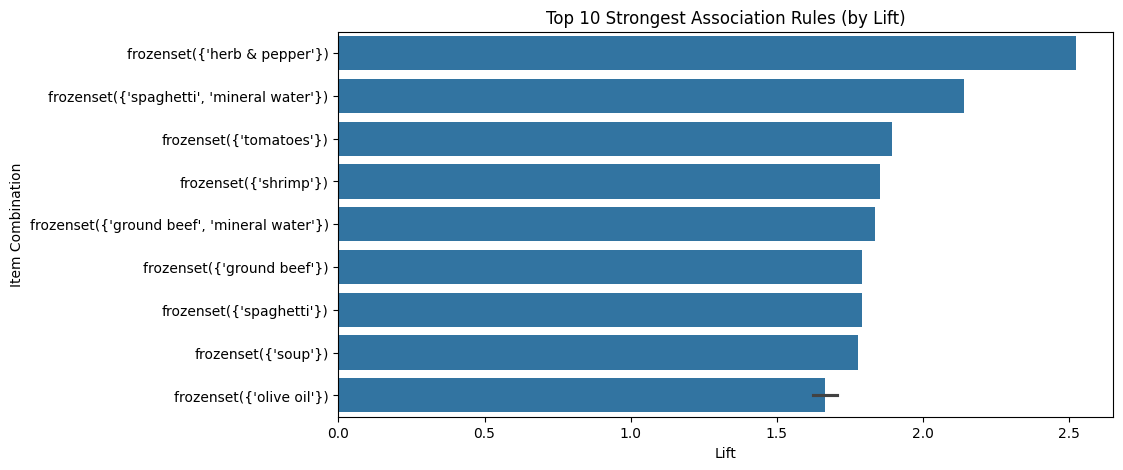

In [32]:
# Analysis and Interpretation

# Plot Top 10 Lift values
plt.figure(figsize=(10,5))
sns.barplot(x=rules_sorted["lift"].head(10), y=rules_sorted["antecedents"].head(10).astype(str))
plt.xlabel("Lift")
plt.ylabel("Item Combination")
plt.title("Top 10 Strongest Association Rules (by Lift)")
plt.show()

# Answer interview questions

In [36]:
# Interview Questions - Answers

print("\nInterview Questions and Answers:")

# 1. What is Lift and why is it important?
print("\n1. What is Lift and why is it important?")
print("Lift measures how much more likely two items are to be bought together compared to random chance.")
print("A lift >1 indicates a strong positive association, while a lift <1 means items are negatively related.")
print("It helps in identifying strong associations that are not just due to high frequency.")

# 2. What is Support and Confidence? How do you calculate them?
print("\n2. What is Support and Confidence? How do you calculate them?")
print("Support: Percentage of transactions containing the item(s). Formula: Support = (Frequency of itemset) / (Total transactions)")
print("Confidence: Probability that item Y is purchased when item X is purchased. Formula: Confidence = (Support of X & Y) / (Support of X)")

# 3. What are some limitations or challenges of Association Rule Mining?
print("\n3. What are some limitations or challenges of Association Rule Mining?")
print("- Computational Complexity: Large datasets increase processing time significantly.")
print("- Setting Thresholds: Choosing the right support and confidence values is challenging.")
print("- Redundant Rules: Many generated rules might not provide new insights.")


Interview Questions and Answers:

1. What is Lift and why is it important?
Lift measures how much more likely two items are to be bought together compared to random chance.
A lift >1 indicates a strong positive association, while a lift <1 means items are negatively related.
It helps in identifying strong associations that are not just due to high frequency.

2. What is Support and Confidence? How do you calculate them?
Support: Percentage of transactions containing the item(s). Formula: Support = (Frequency of itemset) / (Total transactions)
Confidence: Probability that item Y is purchased when item X is purchased. Formula: Confidence = (Support of X & Y) / (Support of X)

3. What are some limitations or challenges of Association Rule Mining?
- Computational Complexity: Large datasets increase processing time significantly.
- Setting Thresholds: Choosing the right support and confidence values is challenging.
- Redundant Rules: Many generated rules might not provide new insights.
